# DESC: Plot select crime in Los Angeles, 2010 - 2018
## CAUTION: Script is work in progess. No warranties of any kind are provided


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime
import plotly 

In [3]:
file_out_data='Resources/Crime_month_dataarea.csv'
csv_in = 'Resources/Crime_Data_from_2010_to_Present.csv'
div_area = 'Resources/LAPD_divisions_area.csv'

## Data Wrangling

In [4]:
# Read in first 100,000 rows if preferred for testing
df = pd.read_csv(csv_in, encoding='utf8', parse_dates=['Date Occurred'])#,nrows=1000)
# Define date field
dt_field = 'Date Occurred'

# Convert column to date time
df[dt_field] = pd.to_datetime(df[dt_field])

df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,2013-03-11,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,2010-01-22,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,2013-03-18,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,2010-11-10,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,2014-01-04,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [5]:

# Define query ensuring date format below and
# Select where crime code description contains defined words
query = (df[dt_field] >= '01-01-2010') & (df[dt_field] <= '12-31-2018')&\
    (df['Crime Code Description'].str.contains('AGGRAVATED|MURDER|RAPE|BURGLARY|LARCENY|VEHICLE THEFT|ARSON|273.5|BTFV/TFMV|GRAND THEFT AUTO'))
# Convert to expected value
query=df.loc[query]


query.head()


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
44,130100569,01/22/2013,2013-01-21,1055,1,Central,147,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2004 0416,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,NaN,NaN,NaN,4TH,SAN PEDRO,"(34.0458, -118.243)"
46,130100572,01/22/2013,2013-01-21,2015,1,Central,166,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 2004,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,NaN,NaN,NaN,7TH,WALL,"(34.0412, -118.2474)"
53,130100613,02/02/2013,2013-02-02,1545,1,Central,192,330,BURGLARY FROM VEHICLE,0329 0344 1307 1607 1309,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,1400 S FLOWER ST,NaN,"(34.0388, -118.2676)"
54,130100622,02/04/2013,2013-02-04,2115,1,Central,182,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0419 0429 0447 0417 0319 0416,...,BOTTLE,AO,Adult Other,230.0,NaN,NaN,NaN,1200 S FLOWER ST,NaN,"(34.0415, -118.2654)"
56,130100632,02/08/2013,2013-02-08,1700,1,Central,185,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1402 0917 0601 0432 0416 0419,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,998.0,NaN,NaN,300 E 12TH ST,NaN,"(34.0363, -118.2573)"


In [6]:

query.to_csv(file_out_data, mode='w',index=False)
df= pd.read_csv(file_out_data)
df = df['Area Name'].value_counts()
df.head()
df.header2= ['AreaName','Count']
# to csv using specified header values
# Drop Area Name, 1 specifies column

df.to_csv('Resources/output.csv',header=True, index_label=df.header2)
dfnew= pd.read_csv('Resources/output.csv')

dfnew.drop(dfnew.columns[[2]], axis=1)
df_count = dfnew.to_csv('Resources/count.csv')
df_count = pd.read_csv('Resources/count.csv')
div_area = pd.read_csv(div_area)
div_area.head()

,APREC,AREA_MI
0,MISSION,36.68
1,DEVONSHIRE,70.59
2,FOOTHILL,67.98
3,TOPANGA,47.56
4,WEST VALLEY,48.97


## Data Wrangling (continued...)
### Merge crime and division data to get area

In [7]:
# Merge crime and district data
area_val=div_area['APREC'].astype('str')
area_count=df_count['AreaName'].astype('str').str.upper()
dist_output =pd.merge(df_count, div_area, how="left", left_on=area_count, right_on=area_val)
#div_data.drop(columns=['Call_Type_Text'])   
# drop columns
dr_ls = ['key_0','Area Name', 'Unnamed: 0']
new_df = dist_output[dr_ls]
dist_output = dist_output.drop(columns=new_df)
dist_output.head()

,AreaName,Count,APREC,AREA_MI
0,77th Street,30314,77TH STREET,16.45
1,Southwest,24661,SOUTHWEST,17.89
2,N Hollywood,23010,N HOLLYWOOD,33.18
3,Southeast,22423,SOUTHEAST,13.58
4,Pacific,22230,PACIFIC,37.35


In [8]:
dist_output['count_sqmi']=round(dist_output['Count']/dist_output['AREA_MI'])
dist_output.head(22)
dist_output.to_csv('Resources/bar_output.csv')

## Create Plot

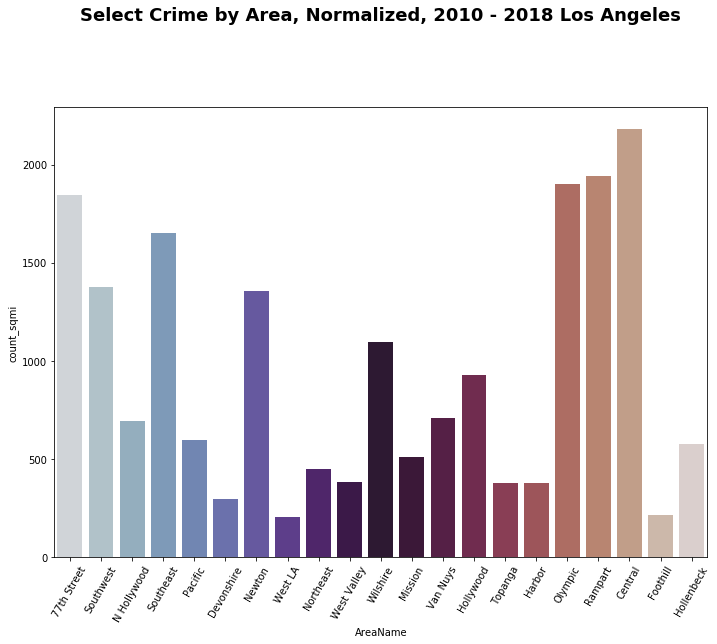

In [9]:

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation=60)
plt.title('Select Crime by Area, Normalized, 2010 - 2018 Los Angeles',y=1.18,fontsize=18,weight=800)
g = sns.barplot(x="AreaName", y="count_sqmi", data=dist_output,palette="twilight")
fname='Resources/crime_area.png'
# output file
plt.savefig(fname,bbox_inches="tight",dpi=300)

# Set as Plotly Plot
## Must provide username and password

In [63]:
# Obtain your api_key here: https://plot.ly/settings/api
# Cufflinks binds plotly to pandas dataframes in IPython notebook.
import plotly.plotly as py
import cufflinks as cf
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username=username, api_key=api_key)
df = pd.read_csv('Resources/bar_output.csv')
df = pd.DataFrame(df)
df.head()


,Unnamed: 0,AreaName,Count,APREC,AREA_MI,count_sqmi
0,0,77th Street,30314,77TH STREET,16.45,1843.0
1,1,Southwest,24661,SOUTHWEST,17.89,1378.0
2,2,N Hollywood,23010,N HOLLYWOOD,33.18,693.0
3,3,Southeast,22423,SOUTHEAST,13.58,1651.0
4,4,Pacific,22230,PACIFIC,37.35,595.0


In [64]:
data = [
    go.Bar(
        x=df['AreaName'], # assign x as the dataframe column 'x'
        y=df['count_sqmi']
    )
]
url = py.plot(data, filename='pandas-bar-chart')
py.iplot(data, filename='mpl-linestyles-column', title='LA Serious Crime by Division')

/home/patty/anaconda3/envs/mar_talk/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

